In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
pd.options.display.max_columns = 100
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams['figure.figsize'] = (20,7)

# Cab Data

### Initial understanding

In [3]:
cab_data_df = pd.read_csv("Cab_Data.csv")
cab_data_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05


In [4]:
cab_data_df.shape

(359392, 7)

In [5]:
cab_data_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [6]:
cab_data_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.00,359392.00,359392.00,359392.00,359392.00
mean,10220761.19,42964.07,22.57,423.44,286.19
std,126805.80,307.47,12.23,274.38,157.99
min,10000011.00,42371.00,1.90,15.60,19.00
25%,10110809.75,42697.00,12.00,206.44,151.20
50%,10221035.50,42988.00,22.44,386.36,282.48
75%,10330937.25,43232.00,32.96,583.66,413.68
max,10440107.00,43465.00,48.00,2048.03,691.20


In [7]:
cab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [8]:
cab_data_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [9]:
cab_data_df.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [10]:
cab_data_df.loc[cab_data_df.duplicated(subset="Transaction ID")]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


#### Insights
1. There is no incomplete data (Cab Data)
2. There are no duplicate values in the data (Cab Data)

### Feature Understanding

In [11]:
cab_data_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [12]:
cab_data_df['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

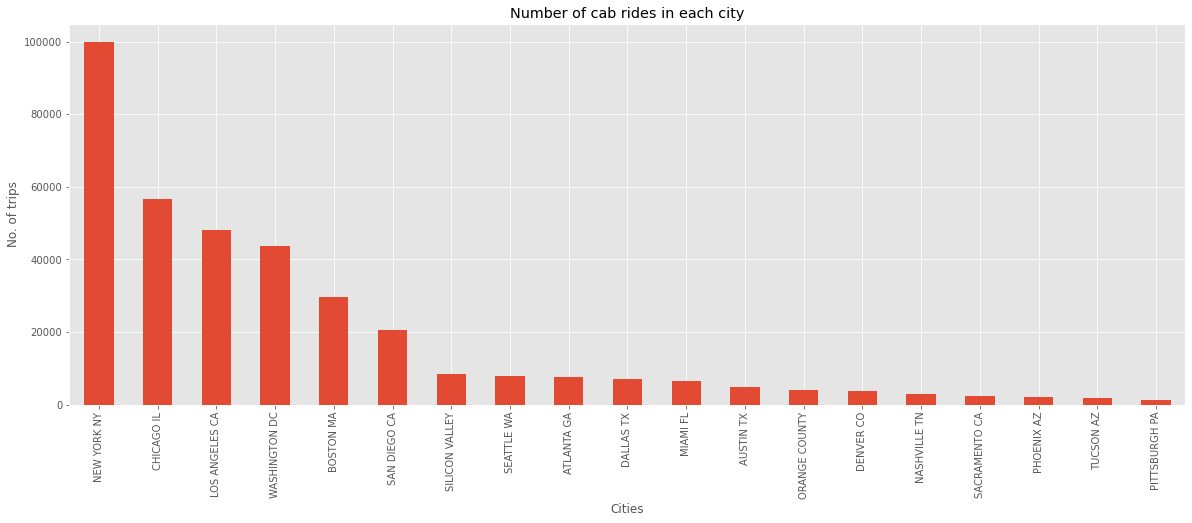

In [13]:
ax = cab_data_df["City"].value_counts().plot(kind='bar', title='Number of cab rides in each city')

ax.set_xlabel('Cities')
ax.set_ylabel('No. of trips')

plt.show()

Here we can see that New York City has the most number of trips, almost double

In [14]:
cab_data_df["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

Text(0, 0.5, 'No. of trips')

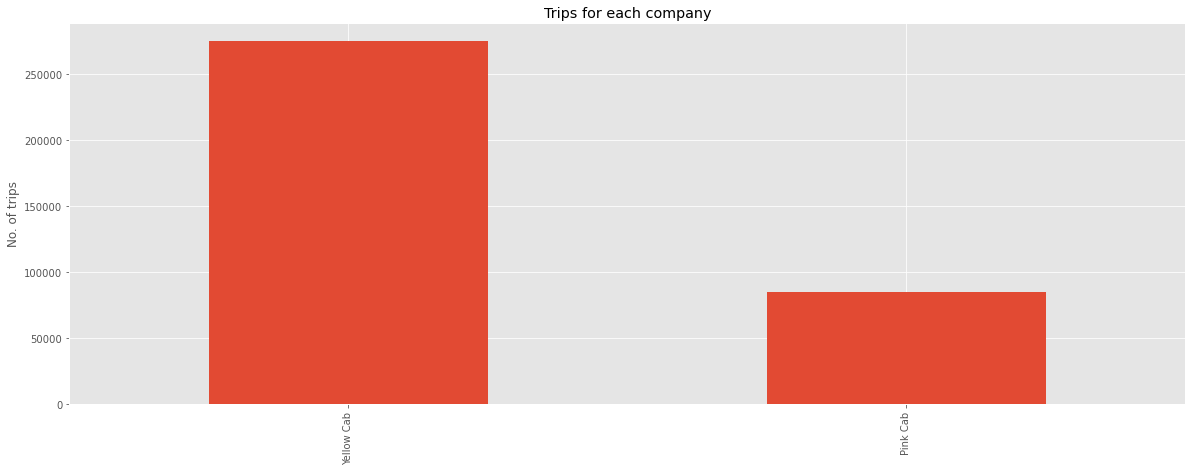

In [15]:
ax = cab_data_df["Company"].value_counts().plot(kind='bar', title='Trips for each company')
ax.set_ylabel("No. of trips")

The Yellow cab company has over 3 times the number of trips than the Pink cab company

### Feature relationships

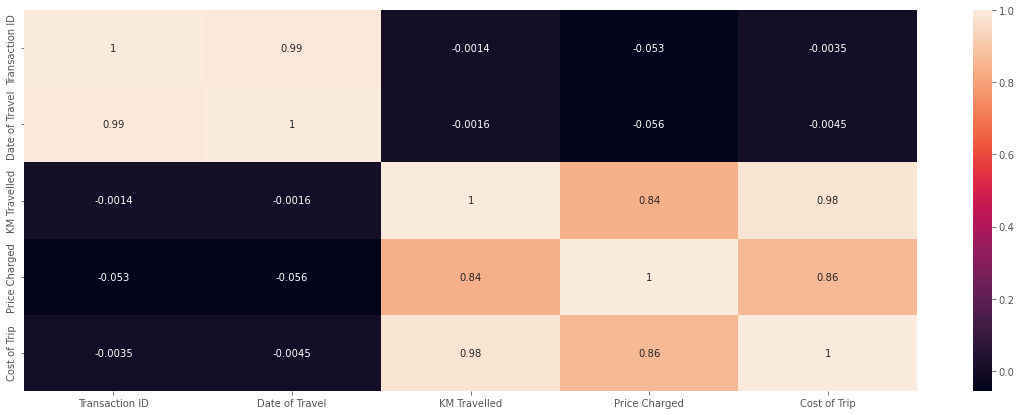

In [16]:
cd_df = cab_data_df[[
    'Transaction ID',
    'Date of Travel',
    # 'Company',
    # 'City',
    'KM Travelled',
    'Price Charged',
    'Cost of Trip'
    ]].copy()

sns.heatmap(cd_df.corr(), annot=True)

plt.show()

- Here we can see with the help of a correlation matrix that there exists a correlation between the 'Transaction ID' and the 'Date of Travel'

- We can also see that there is some correlation between the distance travelled and the cost, however it looks like the cost of trip is more closely correlated to the distance travelled and there is a slight difference charged to the customer for the same trips.
This could be based on several factors, mainly the two different cab companies OR could also be the time of day trips were booked resulting in rush hour price fluctuations

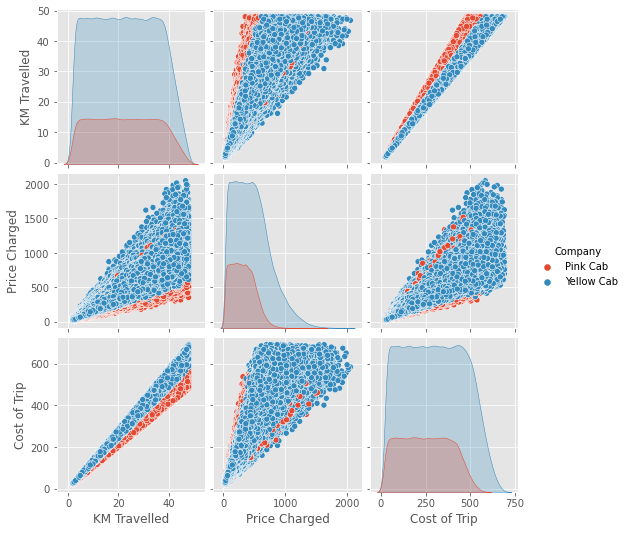

In [17]:
ax = sns.pairplot(cab_data_df,
                  vars=['KM Travelled',
                        'Price Charged',
                        'Cost of Trip'],
                  hue='Company')

plt.show()

From the plots above it looks like the "Pink Cab Company" is relatively new and the "Yellow Cab Company" has been around for some time.

- The "Pink Cab Company" has it's pricing in the lower ranges seemingly to attract more customers and make a name for themselves which is a proven business strategy.

- The "Yellow Cab Company" having pedigree in the market can keep the prices higher as they already have a larger customer base, doubled up by the fact that there are more than 3 times more trips by them compared to the "Pink Cab Company" they can afford to do so while generating more revenue.

Since it looks like the Pink Cab Company is up and coming, let's see how long they have been in business

In [18]:
cab_data_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

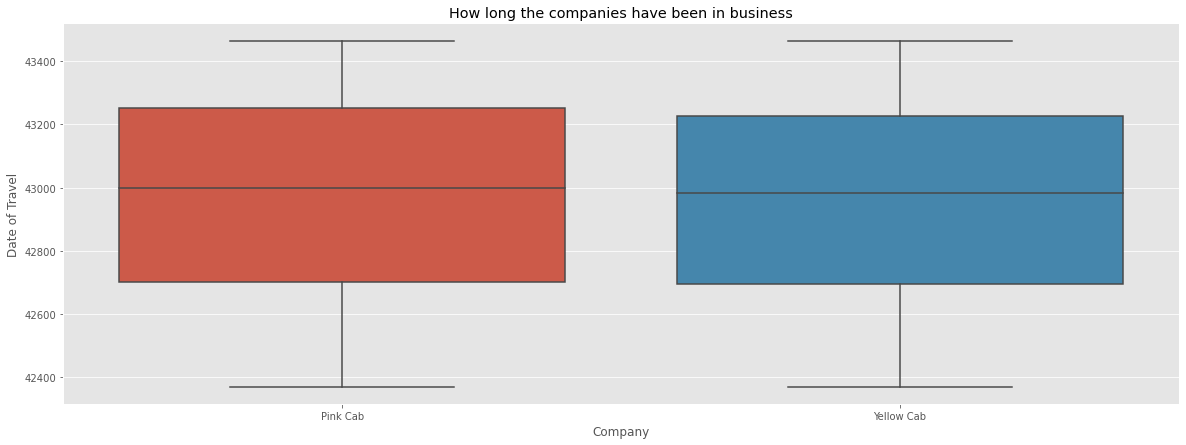

In [19]:
ax = sns.boxplot(
    data=cab_data_df,
    x='Company',
    y='Date of Travel'
)
plt.title("How long the companies have been in business")
plt.show()

From this boxplot we can see that our assumption that the "Pink Cab Company" is a newcomer in the industry has been proven WRONG, both the companies have been running together.

- The averages are straightforward meaning that there has been a consistent number of trips taken by both companies.

- The "Yellow Cab Company" has a lot more customers using their services in the same timeframe.

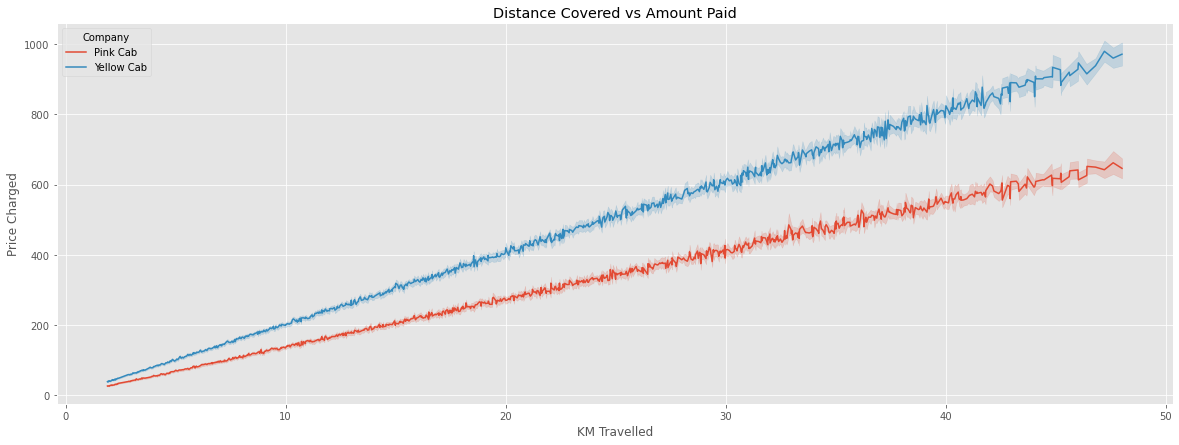

In [20]:
ax = sns.lineplot(
    data=cab_data_df,
    x='KM Travelled',
    y='Price Charged',
    hue='Company'
)
plt.title("Distance Covered vs Amount Paid")
plt.show()

Clearly, neither the distance of the trip nor the price deters consumers from using the Yellow Cab instead of the Pink.

# Customer ID

### Initial understanding

In [4]:
cid_df = pd.read_csv('Customer_ID.csv')
cid_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [22]:
cid_df.shape

(49171, 4)

In [23]:
cid_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [24]:
cid_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.00,49171.00,49171.00
mean,28398.25,35.36,15015.63
std,17714.14,12.60,8002.21
min,1.00,18.00,2000.00
25%,12654.50,25.00,8289.50
50%,27631.00,33.00,14656.00
75%,43284.50,42.00,21035.00
max,60000.00,65.00,35000.00


In [25]:
cid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [26]:
cid_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [27]:
cid_df.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

In [28]:
cid_df.loc[cid_df.duplicated(subset="Customer ID")]

,Customer ID,Gender,Age,Income (USD/Month)


#### Insights

Just like in the case of Cab Data

1. There is no incomplete data
2. There are no duplicates in the data

### Feature Understanding

In [29]:
cid_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [30]:
cid_df['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

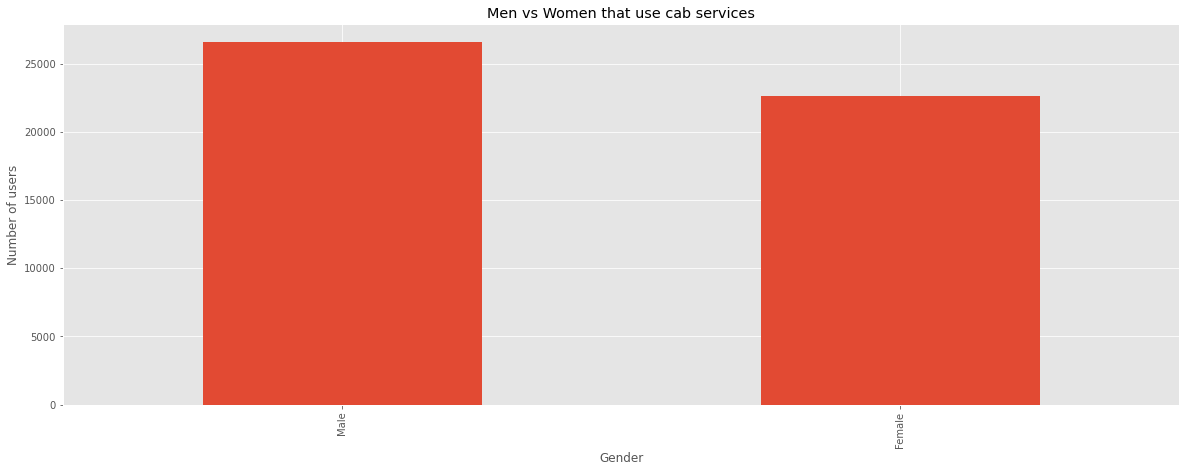

In [31]:
ax = cid_df['Gender'].value_counts().plot(kind='bar', title='Men vs Women that use cab services')

ax.set_xlabel("Gender")
ax.set_ylabel("Number of users")

plt.show()

There seems to be on MAJOR differences between male and female users of the cabs

### Feature Relationship

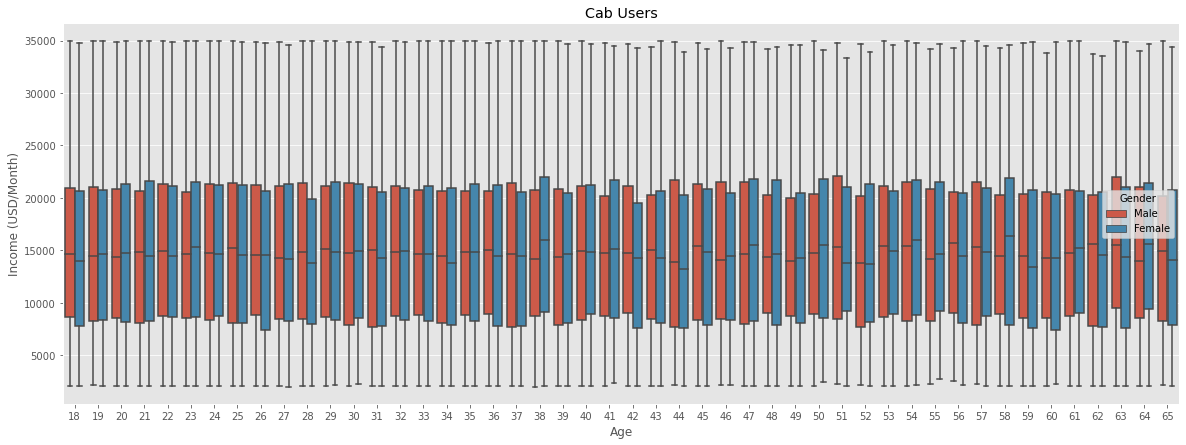

In [32]:
ax = sns.boxplot(
    data=cid_df,
    x='Age',
    y='Income (USD/Month)',
    hue="Gender"
)

ax.set_title("Cab Users")

plt.show()

The data shows that regardless of gender or income, everyone of all ages used the cab service.

In [33]:
cid_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [34]:
cid_df2 = cid_df.groupby('Age')['Age'].count()
cid_df2

Age
18    1551
19    1561
20    1641
21    1554
22    1596
23    1615
24    1547
25    1597
26    1577
27    1571
28    1588
29    1511
30    1573
31    1549
32    1585
33    1495
34    1629
35    1503
36    1534
37    1575
38    1512
39    1624
40    1561
41     523
42     526
43     532
44     492
45     551
46     540
47     539
48     533
49     539
50     538
51     525
52     539
53     510
54     506
55     504
56     521
57     498
58     536
59     552
60     501
61     580
62     497
63     512
64     536
65     492
Name: Age, dtype: int64

In [35]:
cid_df3 = cid_df.groupby('Age')
cid_df3.describe()

Customer ID                                                               \
          count     mean      std    min      25%      50%      75%      max   
Age                                                                            
18      1551.00 28180.88 17232.11   6.00 13397.00 27431.00 42595.50 59944.00   
19      1561.00 27979.75 17705.03  30.00 12410.00 27157.00 42761.00 59984.00   
20      1641.00 28289.32 17758.51   8.00 12500.00 27314.00 43300.00 59973.00   
21      1554.00 28579.89 17758.43  45.00 12834.75 27964.00 42763.50 59976.00   
22      1596.00 28501.30 17833.97  33.00 12747.50 27996.00 43661.00 59989.00   
23      1615.00 27874.21 17866.79  39.00 12201.00 26476.00 42954.50 59998.00   
24      1547.00 28173.96 17723.11   5.00 13136.00 26688.00 43288.50 59995.00   
25      1597.00 29022.41 18127.23  28.00 12783.00 28180.00 44372.00 59991.00   
26      1577.00 28599.47 17959.11  84.00 12464.00 27955.00 43200.00 59962.00   
27      1571.00 28505.57 18024.91   3.00 12460.50 27661.00 44177.00 60000.00   
28      1588.00 28906.36 17723.70  13.00 13356.50 28079.50 44025.50 59990.00   
29      1511.00 28227.58 17356.51  31.00 12848.50 28049.00 42600.00 59992.00   
30      1573.00 29151.11 17903.26  25.00 13049.00 28888.00 43847.00 59987.00   
31      1549.00 29239.79 17680.95   2.00 13487.00 28541.00 44031.00 59979.00   
32      1585.00 27940.86 17943.68   9.00 11196.00 27089.00 43021.00 59917.00   
33      1495.00 27982.62 17930.26   4.00 12235.00 27096.00 43223.00 59975.00   
34      1629.00 28970.97 17645.39  22.00 13439.00 28659.00 43633.00 59967.00   
35      1503.00 29516.40 17808.68  15.00 13917.00 29106.00 44291.50 59993.00   
36      1534.00 28739.52 17529.17   1.00 13332.75 28404.50 42868.25 59947.00   
37      1575.00 28714.07 17525.08  46.00 13350.00 27695.00 43177.50 59985.00   
38      1512.00 28703.27 17703.21  36.00 13205.00 27671.50 43786.50 59999.00   
39      1624.00 28034.35 17663.91  21.00 12718.50 26747.50 43141.00 59931.00   
40      1561.00 28641.75 17736.56  24.00 12308.00 28575.00 43673.00 59983.00   
41       523.00 28249.24 17777.55  72.00 12351.50 27913.00 42409.00 59907.00   
42       526.00 26952.94 17480.88  18.00 10745.75 26843.50 41691.25 59826.00   
43       532.00 27131.59 17551.80 344.00 11642.00 25344.00 42256.50 59965.00   
44       492.00 28147.80 17837.71  26.00 11665.00 27407.00 42700.25 59689.00   
45       551.00 27749.16 17649.50  12.00 11587.00 27001.00 42258.00 59878.00   
46       540.00 29030.14 17831.32 286.00 12540.25 28128.50 44513.25 59915.00   
47       539.00 26617.40 17136.60  19.00 11574.50 25611.00 41627.00 59898.00   
48       533.00 28472.71 17488.06  10.00 13289.00 28708.00 42751.00 59969.00   
49       539.00 27162.50 17600.60 149.00 11732.00 25656.00 42400.50 59867.00   
50       538.00 28309.86 18250.96  14.00 11954.50 27134.00 44163.25 59982.00   
51       525.00 28931.77 18123.23  65.00 12729.00 28370.00 44702.00 59996.00   
52       539.00 28667.15 17477.83 155.00 12085.00 28593.00 43244.50 59972.00   
53       510.00 27927.12 17445.17  57.00 13362.75 27545.50 42143.25 59810.00   
54       506.00 27991.30 17535.87 352.00 13112.50 26076.00 43240.50 59672.00   
55       504.00 28371.68 17666.66 224.00 11433.25 27353.00 42861.75 59924.00   
56       521.00 27470.45 17249.07  59.00 12040.00 26277.00 41664.00 59950.00   
57       498.00 27164.79 17517.22 230.00 11189.00 25942.50 42203.75 59920.00   
58       536.00 28654.91 18064.95 203.00 12199.75 26985.00 43929.25 59949.00   
59       552.00 29206.30 18059.93  17.00 12825.25 29266.00 44858.75 59926.00   
60       501.00 26818.04 17608.11  77.00 11040.00 26175.00 41849.00 59664.00   
61       580.00 27734.91 17483.72 117.00 12021.50 27637.00 42443.75 59970.00   
62       497.00 27114.05 16715.61  32.00 12407.00 26914.00 41053.00 59978.00   
63       512.00 28577.17 17758.65  20.00 12716.75 27508.50 43587.75 59997.00   
64       536.00 28032.09 17251.62 123.00 13056.50 27094.50 42248.25 59981.00   
65  

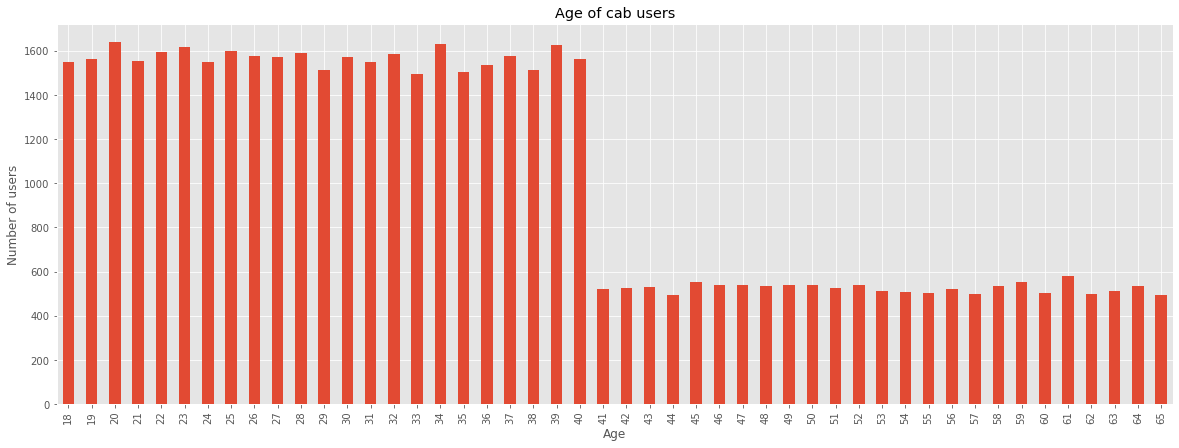

In [36]:
cid_df2.plot(kind='bar')

plt.title("Age of cab users")
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.show()

Most customers are of the younger demographic. 

# Transaction ID

In [5]:
tid_df = pd.read_csv('Transaction_ID.csv')
tid_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [38]:
tid_df.shape

(440098, 3)

In [39]:
tid_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [40]:
tid_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [41]:
tid_df.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

In [42]:
tid_df.loc[tid_df.duplicated(subset="Transaction ID")]

,Transaction ID,Customer ID,Payment_Mode


Clearly there are no duplicates in the data

In [43]:
tid_df1 = tid_df.groupby('Payment_Mode')['Transaction ID']
tid_df1.describe()

,count,mean,std,min,25%,50%,75%,max
Payment_Mode,,,,,,,,
Card,263991.00,10220256.02,126990.90,10000011.00,10110281.50,10220345.00,10330193.00,10440108.00
Cash,176107.00,10219764.92,127127.08,10000013.00,10109639.50,10219639.00,10329899.00,10440105.00


### Feature relationships

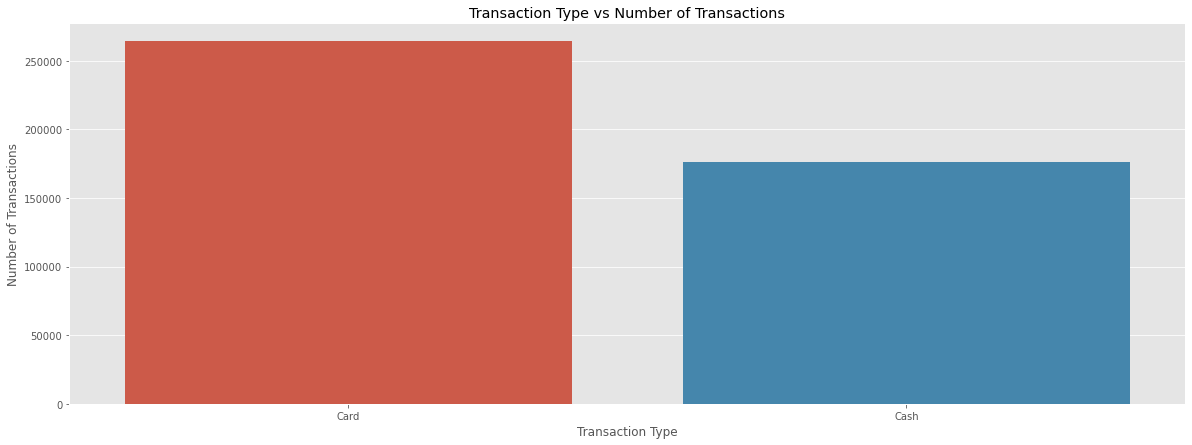

In [44]:
ax = sns.countplot(x='Payment_Mode', data=tid_df)

plt.title('Transaction Type vs Number of Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

Unsurprisingly, most transactions are via Card payment but not by too much, just almost a third more

# City

In [6]:
city_df = pd.read_csv('City.csv')
city_df

,City,Population,Users
0,NEW YORK NY,"84,05,837","3,02,149"
1,CHICAGO IL,"19,55,130","1,64,468"
2,LOS ANGELES CA,"15,95,037","1,44,132"
3,MIAMI FL,"13,39,155","17,675"
4,SILICON VALLEY,"11,77,609","27,247"
5,ORANGE COUNTY,"10,30,185","12,994"
6,SAN DIEGO CA,"9,59,307","69,995"
7,PHOENIX AZ,"9,43,999","6,133"
8,DALLAS TX,"9,42,908","22,157"
9,ATLANTA GA,"8,14,885","24,701"


In [46]:
city_df.shape

(20, 3)

This is a small dataset and we do not need to do rigorous analysis to check for duplicates or null values.

Clearly the dataset has no null values or duplicates.

In [7]:
city_df.dtypes

City          object
Population    object
Users         object
dtype: object

The values in the column are strings which will cause issues while plotting so we have to change the dtype first

In [8]:
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)

In [10]:
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

In [12]:
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

Now we can draw insights from this dataframe

### Feature Relationships

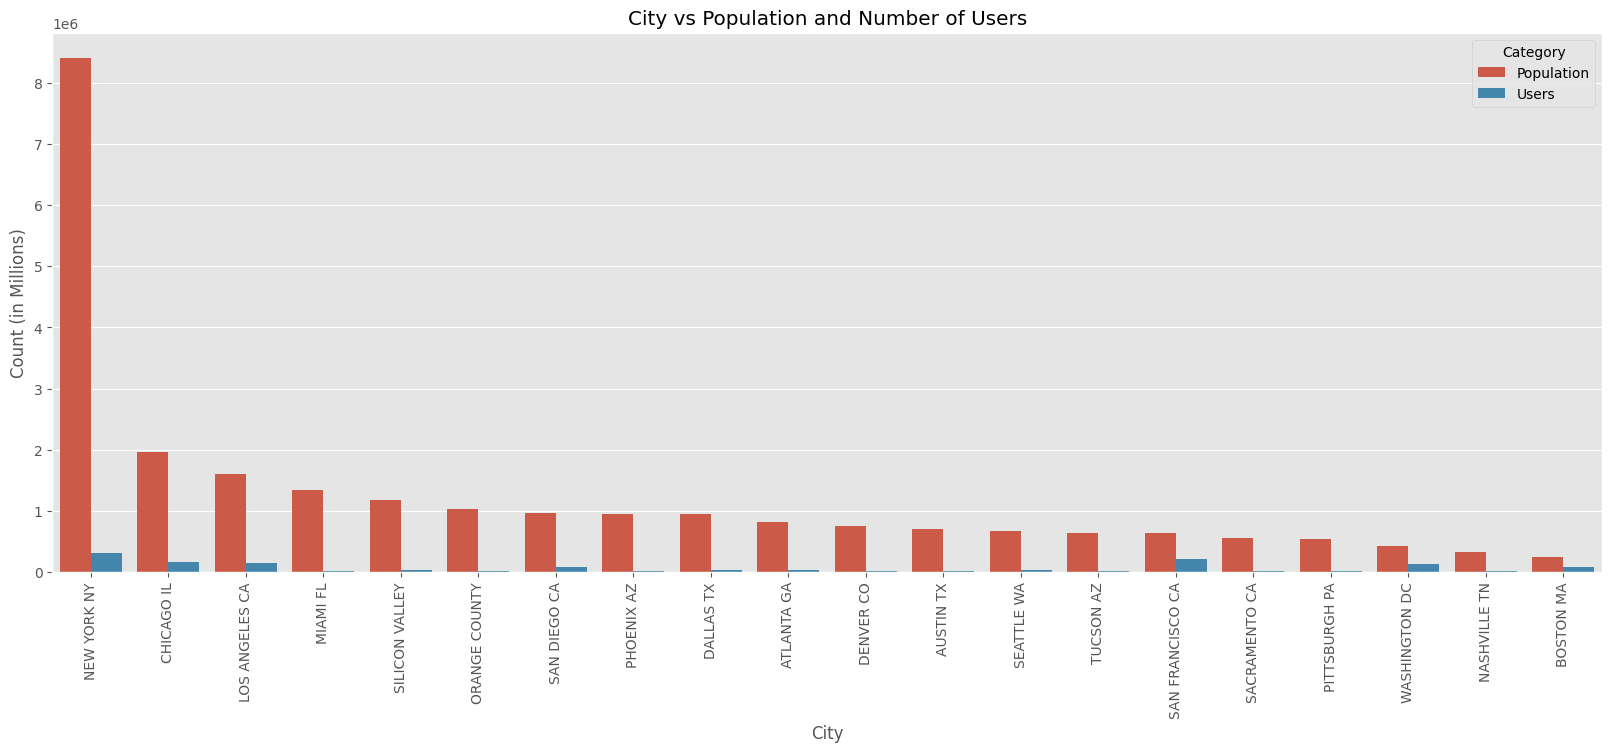

In [14]:
stacked_df = pd.melt(city_df, id_vars=['City'], value_vars=['Population', 'Users'], var_name='Category', value_name='Count')

sns.barplot(data=stacked_df, x='City', y='Count', hue='Category')
plt.title('City vs Population and Number of Users')
plt.xlabel('City')
plt.ylabel('Count (in Millions)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

From the data we can see that, compared to the total population of a city, there are comparatively very few users of cabs.

San Francisco CA though, does have a high number of users even though the population is comparatively very low.

### Combining the data

Let us now look at the data as a whole and try to get more valuable insights

In [15]:
cab_data_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05


In [16]:
cid_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [17]:
tid_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [19]:
dfa = cid_df.merge(tid_df)
dfa

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [20]:
df = cab_data_df.merge(dfa)

In [21]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Male,24,15651,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Male,32,6528,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Male,56,7966,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Male,32,6423,Card


Let's conduct some initial analysis on this dataframe now

In [22]:
df.shape

(359392, 12)

In [23]:
df.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Gender                 object
Age                     int64
Income (USD/Month)      int64
Payment_Mode           object
dtype: object

In [24]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

In [25]:
df.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Customer ID            46148
Gender                     2
Age                       48
Income (USD/Month)     22725
Payment_Mode               2
dtype: int64

From initial analysis of the combined data we can see:

1. There are no duplicates or nulls (This can be confirmed by the initial individual analysis)

2. All the cab rides are now linked with the specific customer that booked onto the trip.

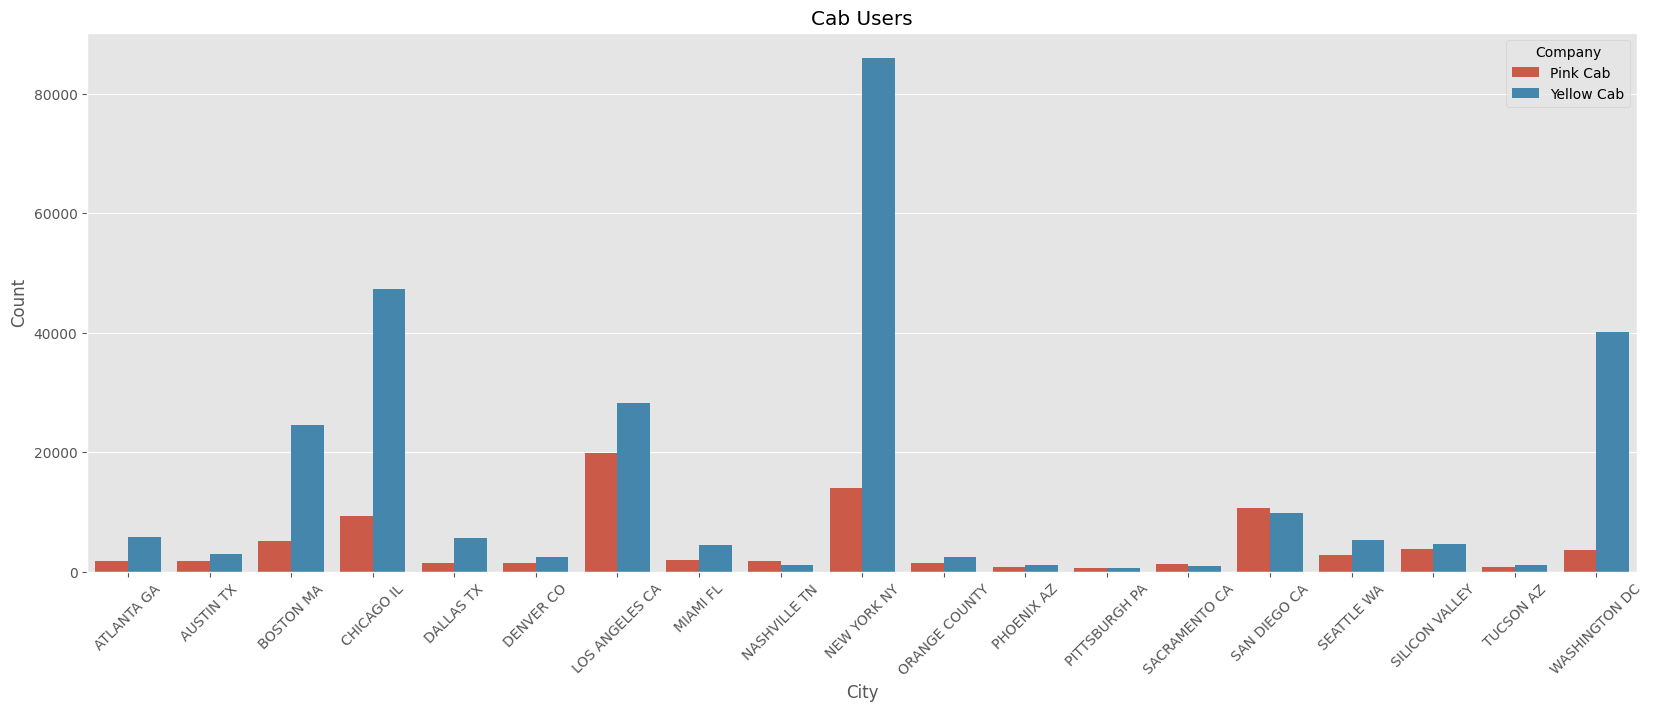

In [28]:
ax = sns.countplot(
    data=df,
    x='City',
    hue='Company'
)

plt.title('Cab Users')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

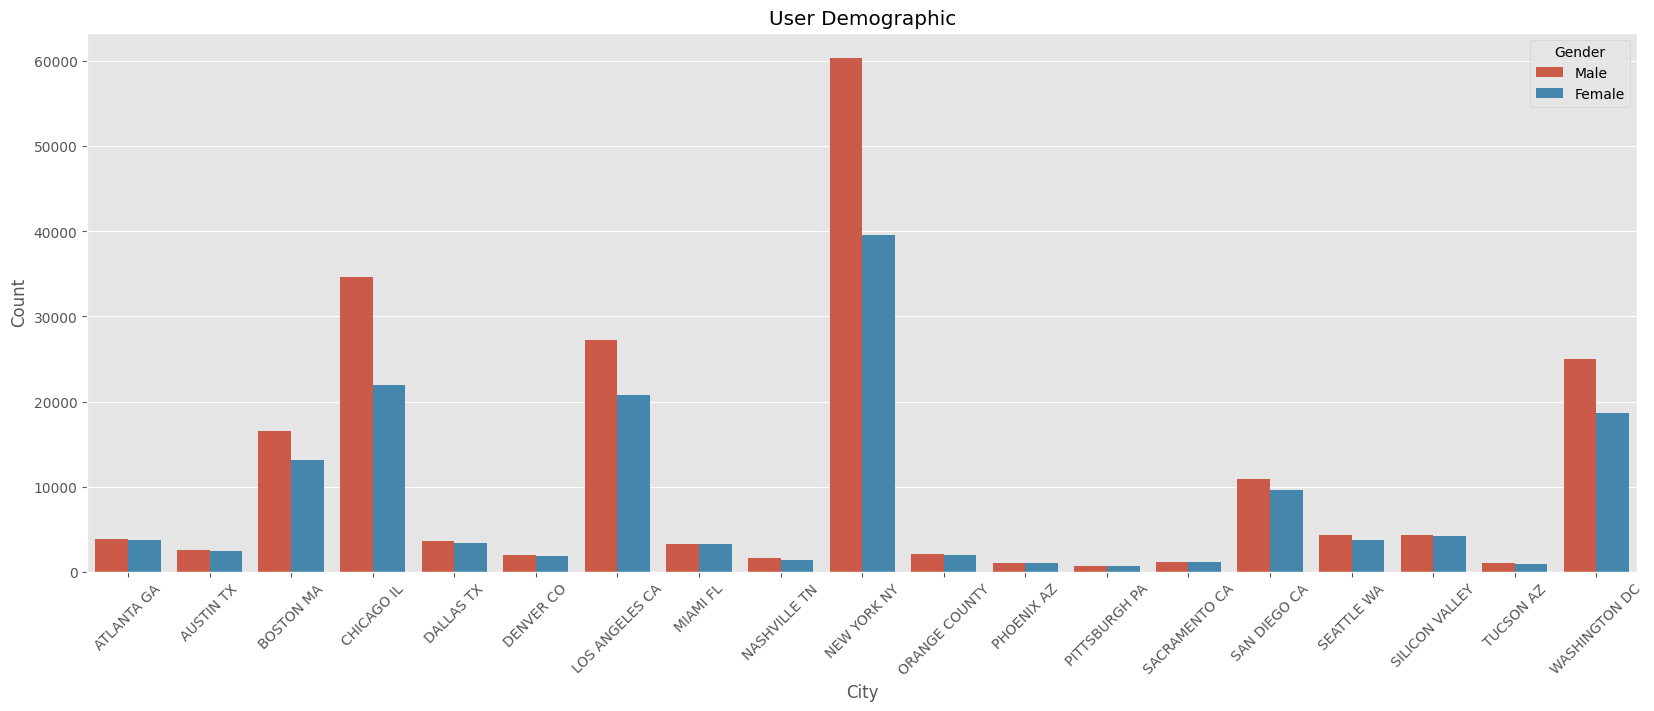

In [29]:
ax = sns.countplot(
    data=df,
    x='City',
    hue='Gender'
)

plt.title('User Demographic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

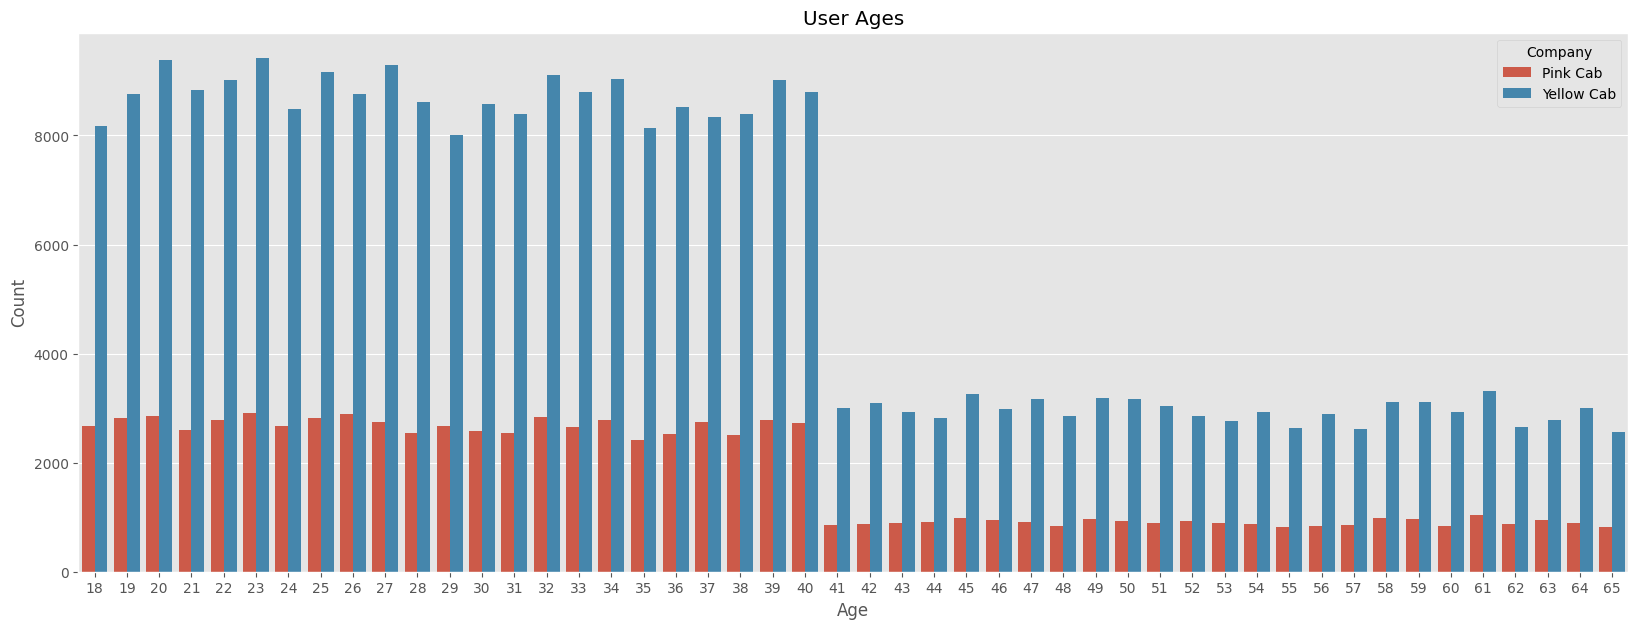

In [31]:
ax = sns.countplot(
    data=df,
    x='Age',
    hue='Company'
)

plt.title('User Ages')
plt.ylabel('Count')
plt.show()

1. From this data we can see that the Yellow Cab company is prefered in almost every state except for:

- Nashville TN
- Sacramento CA
- San Diego CA
- With Pittsburgh PA being about even.

2. We can also see that the gender also does not play a role in which cab company is prefered in the cities.

3. There is also no significant difference in the different age groups that use the service, except for the fact that after the age of 40 people tend to use cab services less frequently.

Let's take a look at how each company performs in the the cities

In [34]:
dfy = df.query("Company == 'Yellow Cab'")
dfp = df.query("Company == 'Pink Cab'")

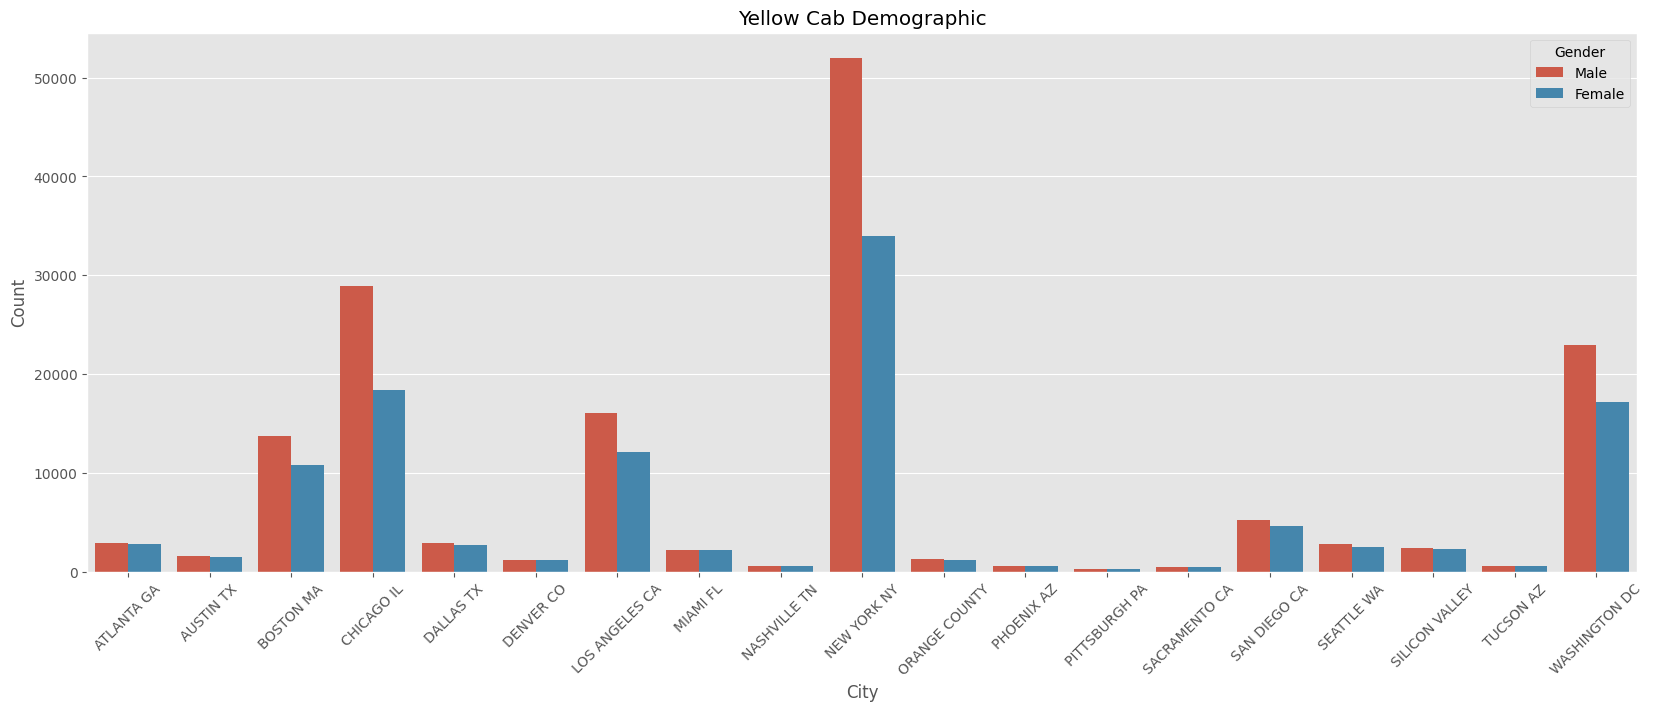

In [38]:
ax = sns.countplot(
    data=dfy,
    x='City',
    hue='Gender'
)

plt.title('Yellow Cab Demographic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

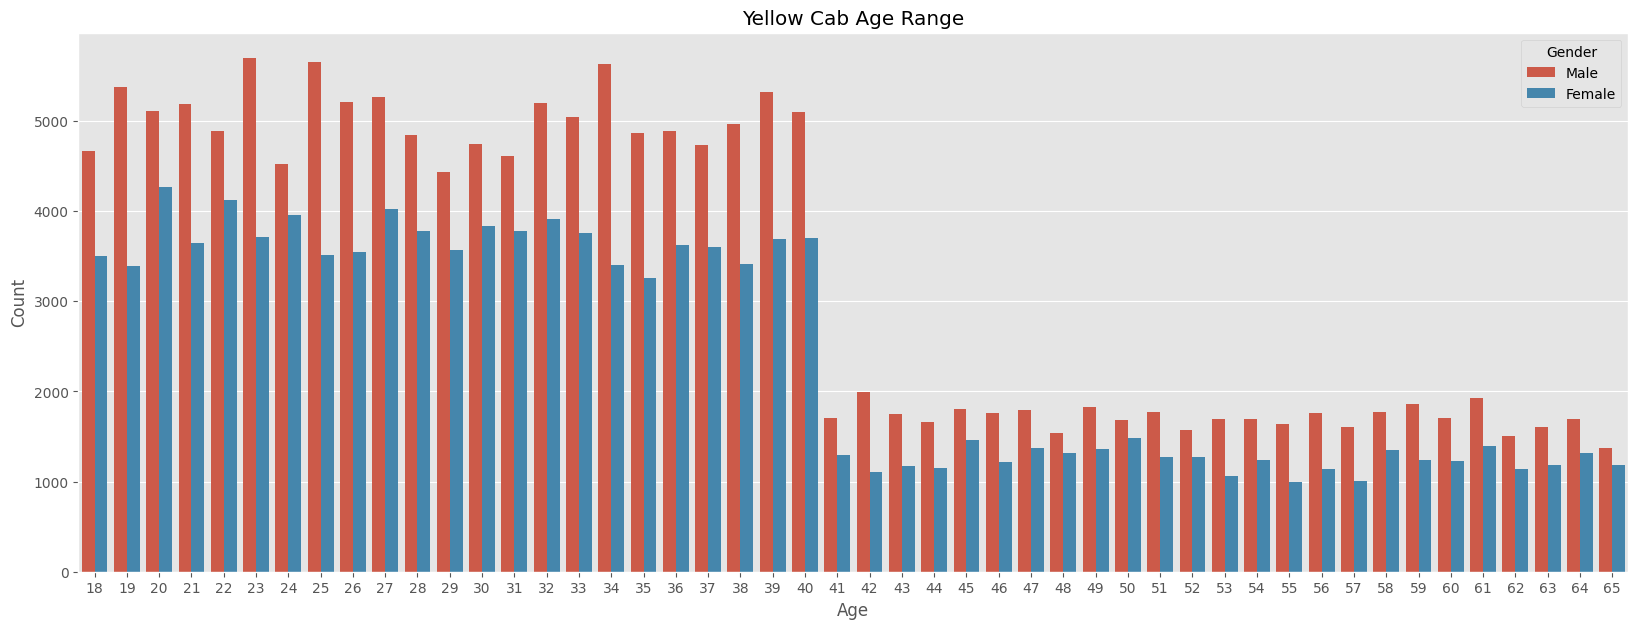

In [44]:
ax = sns.countplot(
    data=dfy,
    x='Age',
    hue='Gender'
)

plt.title('Yellow Cab Age Range')
plt.ylabel('Count')
plt.show()

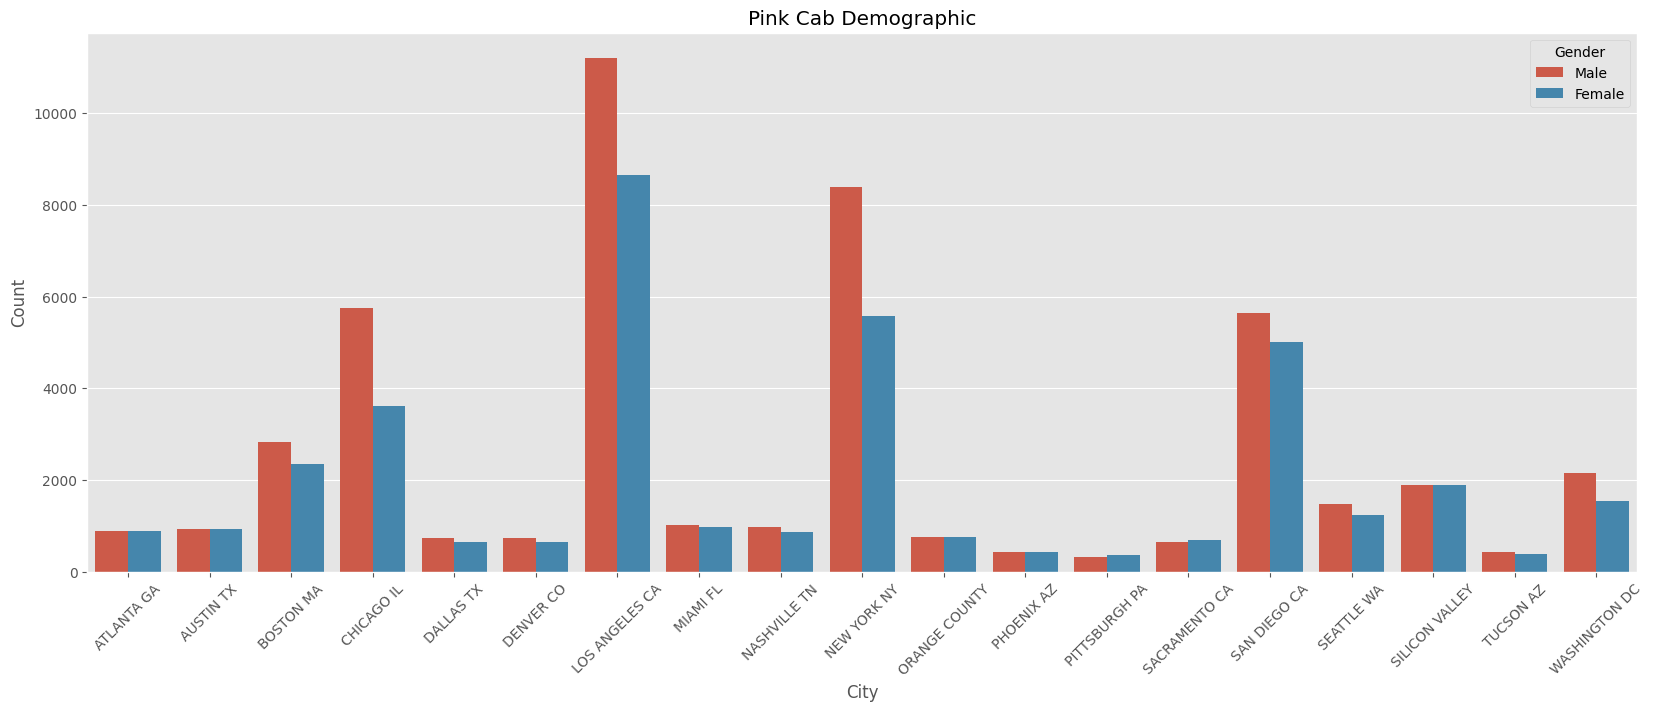

In [39]:
ax = sns.countplot(
    data=dfp,
    x='City',
    hue='Gender'
)

plt.title('Pink Cab Demographic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

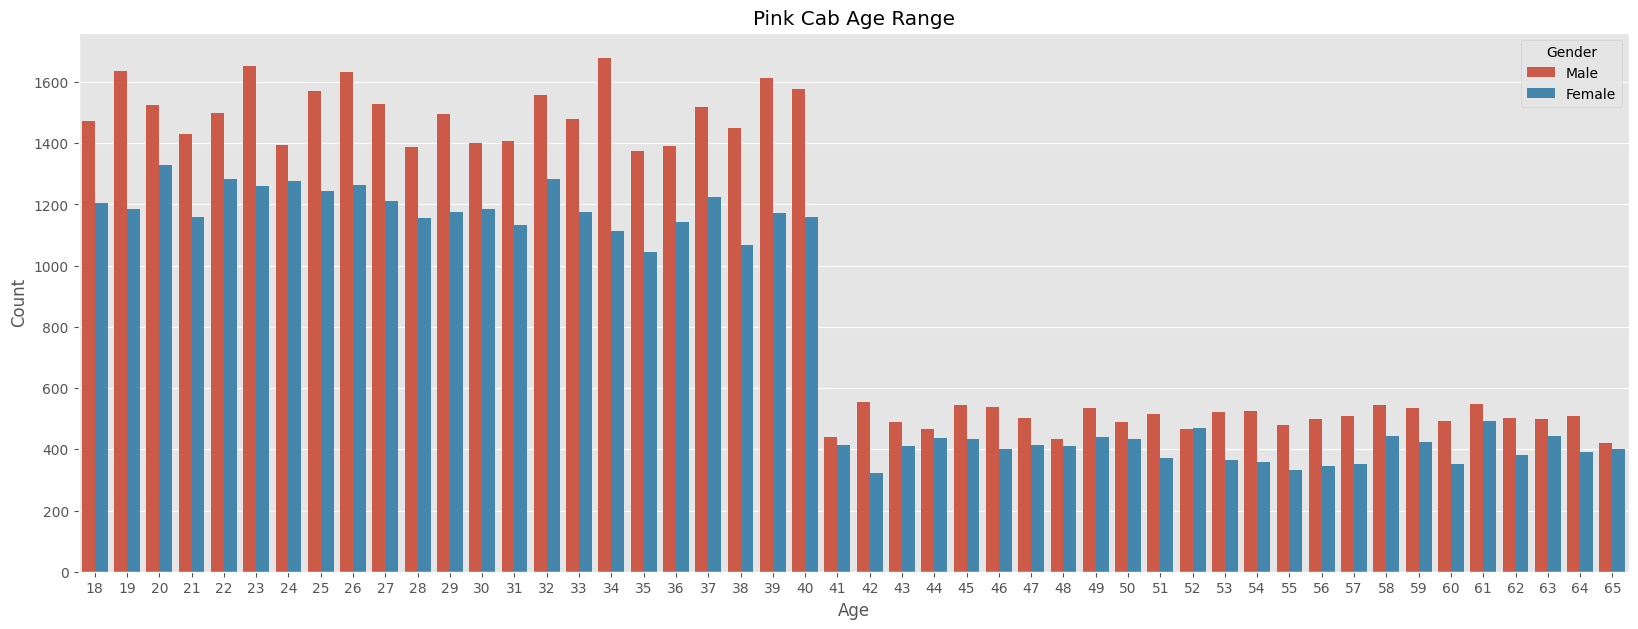

In [43]:
ax = sns.countplot(
    data=dfp,
    x='Age',
    hue='Gender'
)

plt.title('Pink Cab Age Range')
plt.ylabel('Count')
plt.show()

It doesn't look like there is any significant difference at all in the choice of company for all users.

From what we can gather from the data, there is a huge bias towards the Yellow Cab Company and it LOOKS like users only choose the Pink Cab Company when the Yellow Cab is not available.

Other than the fact that there are slightly more Male users than female users there is no significant reason as to why the Yellow Cab is prefered over the Pink Cab.

### Final Insights

From all the analysis done, we can conclude that the Yellow Cab company has built a better reputaion and is widely prefered over the Pink Cab by all demographics over all the cities in which the services are present (apart from a select few).

Because of this, the Yellow Cab company can charge a higher price for the same distance of the trips and still customers will prefer them over the Pink Cab.

Even though the Pink Cab charges lesser prices than the Yellow Cab, customers would much rather pay the extra money to use the Yellow Cab whenever possible.

## Financials

From the analysis, we can see that there are no striking factors which compel the use of the Pink Cab over the Yellow Cab and so let's see how the financials of each cab company are.

In [45]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Male,24,15651,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Male,32,6528,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Male,56,7966,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Male,32,6423,Card


In [46]:
df['Profits'] = df['Price Charged'] - df['Cost of Trip']

In [49]:
dfy = df.query("Company == 'Yellow Cab'")
dfp = df.query("Company == 'Pink Cab'")

In [54]:
# yellow cab information
dfy.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profits
count,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00
mean,10219781.39,42960.64,22.57,458.18,297.92,19428.83,35.34,15045.67,160.26
std,126982.92,307.99,12.23,288.39,162.55,21830.79,12.58,7962.73,171.82
min,10000384.00,42371.00,1.90,20.73,22.80,1.00,18.00,2000.00,-176.93
25%,10110836.00,42695.00,11.99,226.68,158.40,2403.00,25.00,8439.00,37.18
50%,10219868.00,42984.00,22.44,425.06,295.60,6445.00,33.00,14676.00,102.00
75%,10329386.00,43225.00,32.96,633.88,432.43,38916.00,42.00,21023.00,228.67
max,10440107.00,43465.00,48.00,2048.03,691.20,60000.00,65.00,34996.00,1463.97


In [55]:
# Pink cab information
dfp.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profits
count,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00
mean,10223938.22,42975.18,22.56,310.80,248.15,18422.58,35.32,15059.05,62.65
std,126178.21,305.50,12.23,182.00,135.40,18084.83,12.64,7991.08,77.59
min,10000011.00,42371.00,1.90,15.60,19.00,1.00,18.00,2000.00,-220.06
25%,10110143.50,42700.00,12.00,159.97,131.87,5317.50,25.00,8371.00,11.21
50%,10225904.00,43000.00,22.44,298.06,246.33,8876.00,33.00,14713.00,41.50
75%,10336416.50,43252.00,32.96,441.50,360.18,27190.00,42.00,21055.00,93.97
max,10437615.00,43465.00,48.00,1623.48,576.00,60000.00,65.00,35000.00,1119.48


As expected, the Yellow Cab company makes on average 100$ more profit on trips